In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
from sklearn.datasets import fetch_california_housing

# データをpndasにいれる

In [385]:
dataset = fetch_california_housing()

In [386]:
x = dataset.data
t = dataset.target

columns = dataset.feature_names

In [387]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (20640, 8), numpy.ndarray, (20640,))

In [388]:
columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [389]:
df = pd.DataFrame(x, columns=columns)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [390]:
df['Target'] = t
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 機械学種をするためにデータをarray型に入れ直す

In [391]:
t = df['Target'].values

In [392]:
x = df.drop(labels='Target', axis=1)

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
x_train,x_test,t_train,t_test = train_test_split(x,t, test_size=0.3, random_state=0) # test_size: テストデータの割合
# テスト用のデータと訓練用のデータに分ける

# 機械学習を行う

In [395]:
from sklearn.linear_model import LinearRegression # 線形回帰

In [396]:
model = LinearRegression()

In [397]:
model.fit(x_train, t_train)

LinearRegression()

In [398]:
model.coef_

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

<BarContainer object of 8 artists>

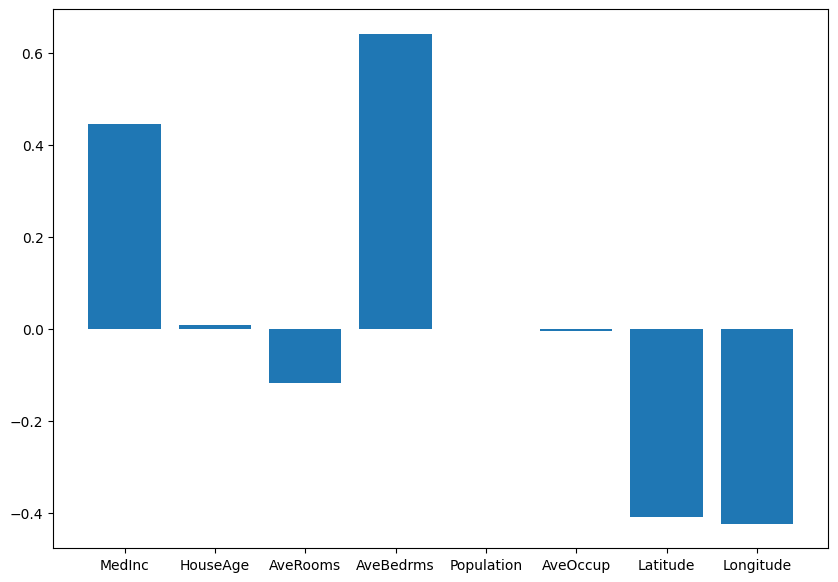

In [399]:
# 予測 重み
plt.figure(figsize=(10,7))
plt.bar(x=columns, height=model.coef_)

In [400]:
model.intercept_

-36.01222888765236

In [401]:
# 過学習が起きて、テストデータの精度が低い
# 学習データにフィットしすぎている
print(f'train score: {model.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 0.6112941337977225
test score: 0.5926087785518773


# 作成したModelで予測を行う
x -> t
両方test

In [402]:
y = model.predict(x_test) # 実際に予測を行う

In [403]:
print(f'予測値: {y[1]}')
print(f'目標値: {t_test[1]}')

予測値: 2.7905991198370117
目標値: 2.413


# 過学習を抑制する

In [404]:
df = pd.read_csv('regression_pls.csv')
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [405]:
df.shape

(1290, 197)

In [406]:
t = df['Target'].values
x = df.drop(labels='Target', axis=1).values

In [407]:
t.shape, x.shape

((1290,), (1290, 196))

In [408]:
x_train, x_test,t_train,t_test = train_test_split(x,t, test_size=0.3, random_state=0)

In [409]:
model = LinearRegression()

In [410]:
model.fit(x_train, t_train)

LinearRegression()

In [411]:
# 過学習が起きて、テストデータの精度が低い
# 学習データにフィットしすぎている 多重共線性があるものがあるらしい
print(f'train score: {model.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {model.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 0.9365473143146129
test score: 0.004243104694099609


# 相関関係が高いかを確認する

In [412]:
df_corr = df.corr()

<Axes: >

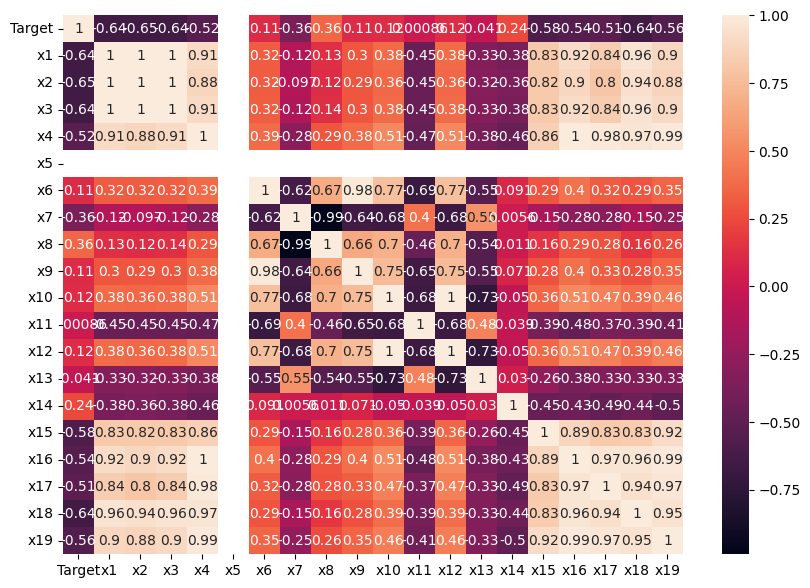

In [413]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr.iloc[:20,:20], annot=True)

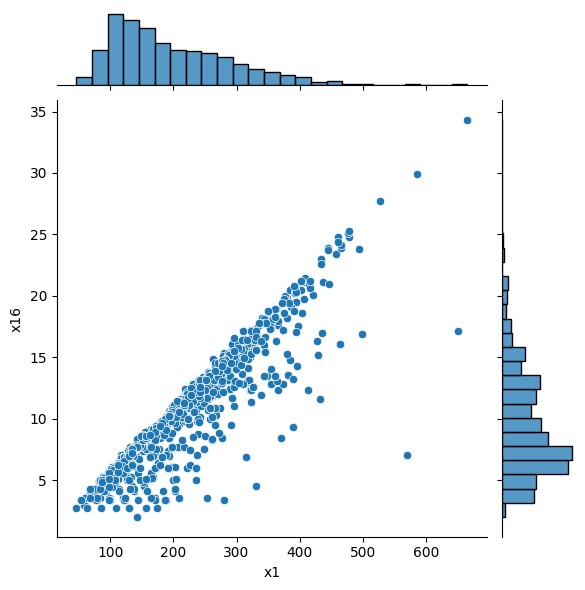

In [414]:
# 斜めにそう関係があるために、多重共線性があると考えられる

sns.jointplot(x='x1',y='x16',data=df)

# PLSを用いて回帰を行う

In [415]:
# X入力値にtの情報を足し合わせて、主成分Tを作成して、最小二乗法を用いて回帰を行う

from sklearn.cross_decomposition import PLSRegression

In [416]:
pls = PLSRegression(n_components=11) # ハイパーパラメーターを調整して、過学習を防ぐ　n_components: 主成分の数

In [417]:
pls.fit(x_train, t_train)

PLSRegression(n_components=11)

In [418]:
# 過学習が起きて、テストデータの精度が低い
# 学習データにフィットしすぎている 多重共線性があるものがあるらしい
print(f'train score: {pls.score(x_train, t_train)}') # 学習済みモデルの精度を確認
print(f'test score: {pls.score(x_test, t_test)}') # 学習時に使っていないデータで精度を確認

train score: 0.9157705245807128
test score: 0.883947511831896
